In [2]:

import pandas as pd
import numpy as np
import re
import unicodedata

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#model
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from textblob import TextBlob

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

#plots
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


#loading small corpus
nlp = spacy.load('en_core_web_sm')

ModuleNotFoundError: No module named 'plotly'

In [4]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [6]:

import pandas as pd
import numpy as np
import re
import unicodedata

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#model
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from textblob import TextBlob

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

#plots
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


#loading small corpus
nlp = spacy.load('en_core_web_sm')

ModuleNotFoundError: No module named 'cufflinks'

In [8]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [13]:

import pandas as pd
import numpy as np
import re
import unicodedata

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#model
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from textblob import TextBlob

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

#plots
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


#loading small corpus
nlp = spacy.load('en_core_web_sm')

In [15]:
#list of contractions and their related expansions (from web)
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"'ll": "will",
"'ve": "have",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"tbh":"to be honest" }

In [25]:
df = pd.read_csv("dataset.csv")
df.head()

Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.  \
0  Easy Tyre Selection Process, Competitive Prici...                                                                                                                                                           
1         Very easy to use and good value for money.                                                                                                                                                           
2              Really easy and convenient to arrange                                                                                                                                                           
3  It was so easy to select tyre sizes and arrang...                                                                                                                                                           
4  service was excellent. Only slight downside wa...                                                                                                                                                           

   Unnamed: 1  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [24]:
df = df.drop(['Unnamed: 1'],axis=1)
#renaming
df.columns = ["document"]

KeyError: "['Unnamed: 1'] not found in axis"

In [27]:
#cleaning the dataset
df = df.drop(['Unnamed: 1'],axis=1)
#renaming
df.columns = ["document"]

KeyError: "['Unnamed: 1'] not found in axis"

In [29]:
df.head()


document
0  Easy Tyre Selection Process, Competitive Prici...
1         Very easy to use and good value for money.
2              Really easy and convenient to arrange
3  It was so easy to select tyre sizes and arrang...
4  service was excellent. Only slight downside wa...

In [32]:
df.isna().sum()


document    0
dtype: int64

In [34]:
def get_avg_word_len(x):
    """Get the average word length from a given sentence
    param x(str): the sentence of whose word length is to be taken
    return leng(numeric): the average word length """

    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)


In [36]:
def feature_extract(df,d):
    """Adds new columns in the given df, from the existing data
    count: number of words in the document (df[d])
    char count: number of characters in df[d]
    avg word_len: the average number of characters in the df[d]
    stop_words_len: number of stopwords present
    numeric_count: number of numeric characters present
    upper_counts: number of words in CAPS LOCK
    polarity: sentiment of the word, from -1(negative) to 1(positive)
    
    param df(dataframe): dataframe on which manipulation is to be done
    param d(str): column name in which the reuired words are present"""
    
    df['count']=df[d].apply(lambda x: len(str(x).split()))
    df['char count']=df[d].apply(lambda x: len(x))
    df['avg word_len'] = df[d].apply(lambda x:get_avg_word_len(x))
    df['stop_words_len'] = df[d].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))
    df['numeric_count'] = df[d].apply(lambda x:len([t for t in x.split()if t.isdigit()] ))
    df['upper_counts'] = df[d].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))
    df['polarity'] = df['document'].map(lambda text: TextBlob(text).sentiment.polarity)

In [38]:
feature_extract(df,'document')
f = df

In [41]:
def expand(x):
    """Some of the words like 'i'll', are expanded to 'i will' for better text processing
    The list of contractions is taken from the internet
    
    param x(str): the sentence in which contractions are to be found and expansions are to be done
    
    return x(str): the expanded sentence"""
    if type(x)== str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

def remove_accented_chars(x):
    """The function changes the accented characters into their equivalent normal form,
    to do so, normalize function with 'NFKD' is used which replaces the compatibility characters into
    theri euivalent
    
    param x(str): the sentence in which accented characters are to be detected and removes
    return x(str): sentence with accented characters replaced by their equivalent"""
    
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x


def make_to_base(x):
    """Converting the words to their base word and dictionary head word i.e to lemmatize
    param x(str): the sentence in which the words are to be converted (lemmatization)
    return x(str): the lemmatized sentence"""
    
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        
        #in spacy, words like I, you are lemmatized as -PRON- and are,and etc are lemmatized to be,
        #since these words are present widely, we keep them as the original. 
        #Anyways the words will be removed as stop words later
        
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    return (" ".join(x_list))

In [53]:
def preprocess(df,d):
    """Preprocesses the given document by applying the following functionalities
    lower: lowers all the characters for uniformity
    expansion: expands words like i'll to i will for better text classification
    remove special characters: using regex, removes all the punctuations etc
    remove space: removes trailing spaces and extra spaces between words
    remove accented characters: change accented characters to its normal equivalent
    remove stop words: removes the stop words in the sentence
    lemmatization: changes the words to their base form"""
    
    df[d] = df[d].apply(lambda x: x.lower())
    df[d] = df[d].apply(expand)
    df[d] = df[d].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))
    df[d] = df[d].apply(lambda x: " ".join(x.split()))
    df[d] = df[d].apply(lambda x: remove_accented_chars(x))
    df[d] = df[d].apply(lambda x: make_to_base(x))
    df[d] = df[d].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))


In [50]:
preprocess(df,'document')

In [54]:
cvectorizer,data_cv = get_bow(df,'document',3,4,5,0.5)

NameError: name 'get_bow' is not defined

In [56]:
def get_bow(df,d,range_min,range_max,mindf,maxdf):
    
    """Returns the count vectorized dataframe based on the arguments
    
    param df(dataframe): dataframe containing the values
    param  d(str): the column name, under which the documents are present
    param range_min(int): smallest n of n-gram wanted
    param range_max(int): largest n of n-gram wanted
    param mindf(int): threshold for common words
    param maxdf(int): threshold for rare words
    
    return cv(CountVectorizer): the count vectorizer
           cv_df(dataframe): dataframe containing the bag of words"""
    
    cv = CountVectorizer(ngram_range=(range_min,range_max),min_df=mindf, max_df=maxdf)
    text_counts = cv.fit_transform(df[d])
    cv_df = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())
    return cv,cv_df

In [58]:
preprocess(df,'document')

In [62]:
cvectorizer,data_cv = get_bow(df,'document',3,4,5,0.5)

In [64]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [67]:
df['count'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')


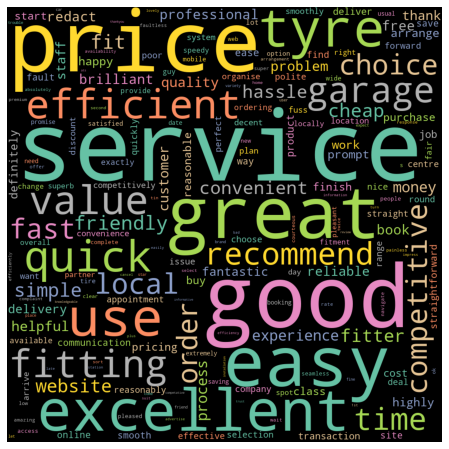

In [69]:
fig = plt.figure(figsize=(20,8))

text = ' '.join(f.loc[f['count']<=10,'document'].values)
wc = WordCloud(width=1000, 
                   height=1000, 
                   random_state=1, 
                   background_color='Black',
                   colormap='Set2',
                   collocations=False).generate(text)

plt.imshow(wc)
plt.axis("off");

In [71]:
df['char count'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Character Length Distribution')

In [73]:
df['avg word_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Average Word Length Distribution')

In [75]:
df['numeric_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review numeric count Distribution')

In [77]:
df['upper_counts'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review number of upper case words Distribution')


In [81]:
def top_n_gram(corpus,r, n=None):
    vec = CountVectorizer(ngram_range=(r, r), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [83]:
common_words = top_n_gram(df['document'], 1, 20)

tdf = pd.DataFrame(common_words, columns = ['document' , 'count'])
tdf.groupby('document').sum()['count'].sort_values(ascending=False).iplot(kind='bar', 
                                                                            yTitle='Count', 
                                                                            linecolor='black', 
                                                                            title='Top 20 unigrams');

In [85]:
common_words = top_n_gram(df['document'], 2, 20)

tdf = pd.DataFrame(common_words, columns = ['document' , 'count'])
tdf.groupby('document').sum()['count'].sort_values(ascending=False).iplot(kind='bar', 
                                                                            yTitle='Count', 
                                                                            linecolor='black', 
                                                                            title='Top 20 bigrams');

In [87]:
common_words = top_n_gram(df['document'], 3, 20)

tdf = pd.DataFrame(common_words, columns = ['document' , 'count'])
tdf.groupby('document').sum()['count'].sort_values(ascending=False).iplot(kind='bar', 
                                                                            yTitle='Count', 
                                                                            linecolor='black', 
                                                                            title='Top 20 trigrams');

In [90]:
common_words = top_n_gram(df['document'], 4, 20)
    
tdf = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
tdf.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', 
                                                                            yTitle='Count', 
                                                                            linecolor='black', 
                                                                            title='Top 20 4-grams')


In [92]:
# Use LDA to look for 12 topics
n_topics = 12
model_lda = LatentDirichletAllocation(n_components=n_topics,random_state=0)
model_lda.fit(data_cv)

# Print the top 10 words per topic
n_words = 10
feature_names = cvectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model_lda.components_):
    top_n = [feature_names[i]
              for i in topic.argsort()
               [-n_words:]][::-1]
    
    top_features = ' '.join(top_n)
    
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")
    print('\n\n\n')
    
topic_result = model_lda.transform(data_cv)
df['topic']  = topic_result.argmax(axis=1)

Topic 0: service good price good price tyre great service good excellent service good good price great great service good price good price quick price great service excellent service good price good price great service




Topic 1: good value money use redact year excellent service price quick efficient service competitive price good tyre fit time buy tyre online great service use good efficient service service good value




Topic 2: tyre great price service competitive price price tyre fit use web site easy use web easy use site easy use web site great service tyre good price local great tyre great




Topic 3: good service good great service easy service good price excellent customer service tyre competitive price good service good price good price find excellent price service tyre good price great choice tyre




Topic 4: good price good great service great great price great price good service service great price great price easy price great service great service great price good s

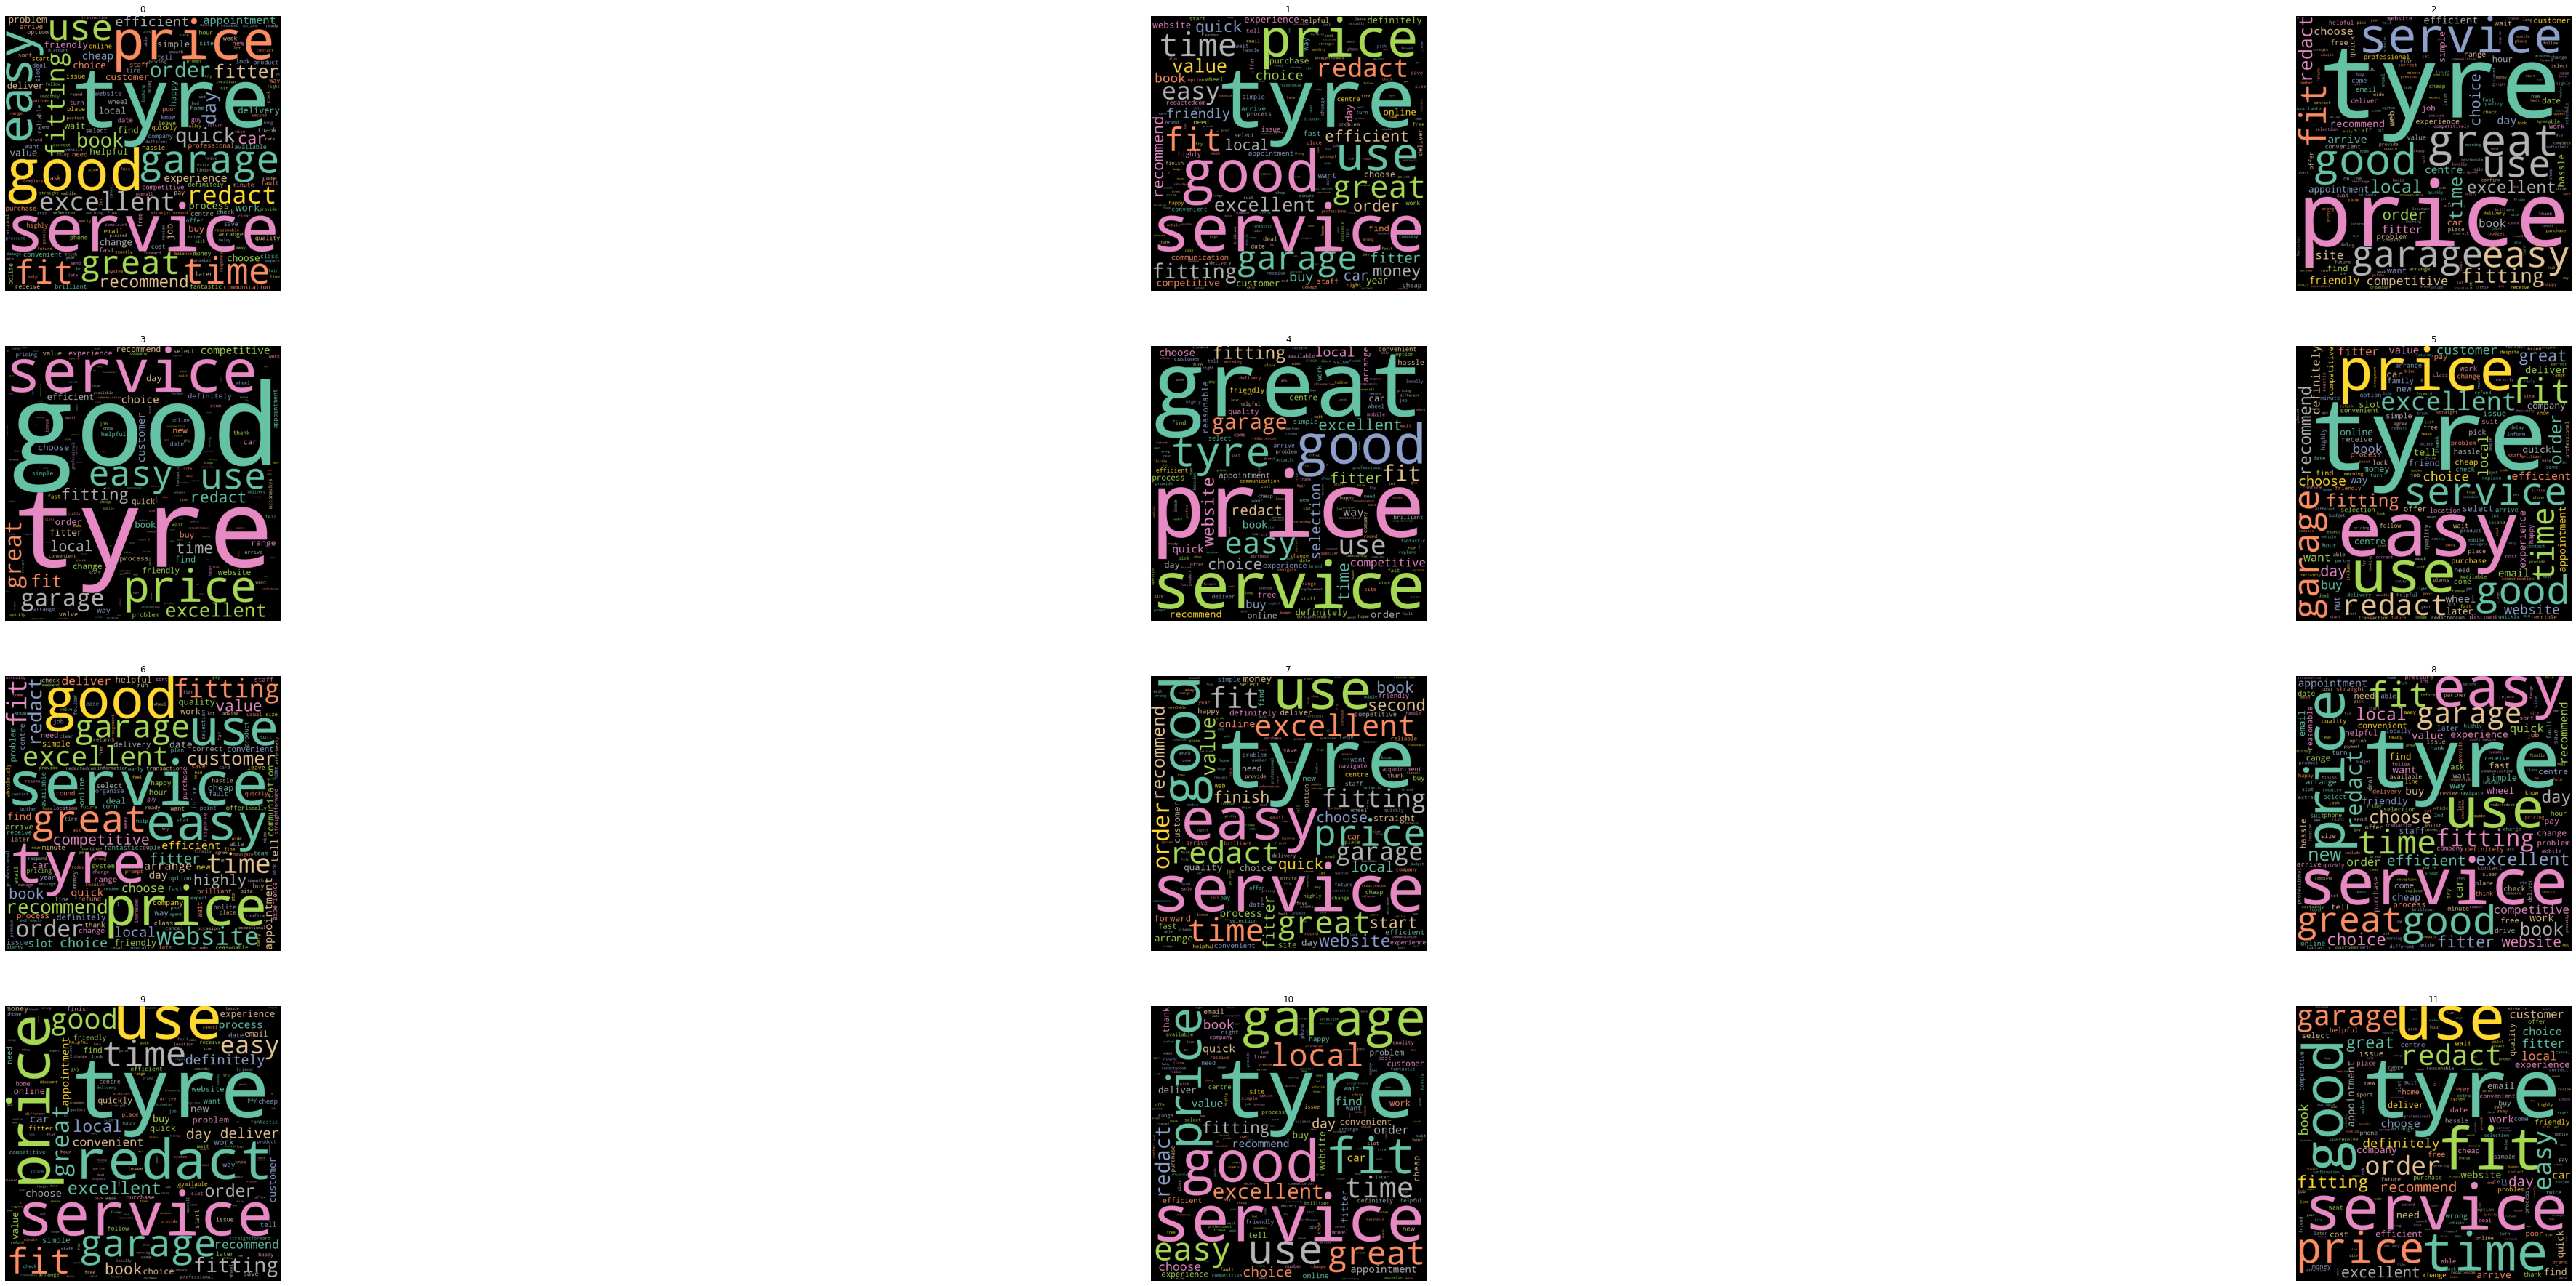

In [94]:
fig = plt.figure(figsize=(80,32))
for i in range(12):
    ax = fig.add_subplot(4,3,i+1)
    topic = i
    text = ' '.join(df.loc[df['topic']==i,'document'].values)
    wc = WordCloud(width=1000, 
                   height=1000, 
                   random_state=1, 
                   background_color='Black',
                   colormap='Set2',
                   collocations=False).generate(text)
    ax.imshow(wc)
    ax.set_title(topic)
    ax.axis("off");


In [118]:
def assign_topic(x):
    if x==0:
        return "value for money"
    elif x==1:
        return "location"
    elif x==2:
        return "garage service"
    elif x==3:
        return "length of fitting"
    elif x==4:
        return "mobile fitter"
    elif x==5:
        return "tyre quality"
    elif x==6:
        return "delivery punctuality"
    elif x==7:
        return "booking confusion"
    elif x==8:
        return "ease of booking"
    elif x==9:
        return "wait time"
    elif x==10:
        return "change of date"
    elif x==11:
        return "discounts"
    
df['topic'] = df['topic'].apply(lambda x:assign_topic(x))

In [119]:
df.groupby('topic').count()['document'].iplot(kind='bar', 
                                              yTitle='Count', 
                                              linecolor='black', 
                                              opacity=0.8,
                                              title='Bar chart of Topic Name',
                                              xTitle='Topic Name')

In [120]:
data=df[['document','topic']]
data = pd.get_dummies(data, columns=['topic'])

In [105]:
#splitting the data
train, test = train_test_split(data, random_state=42, test_size=0.33, shuffle=True)

X_train = train.document
X_test = test.document

#print the shape

print(X_train.shape)
print(X_test.shape)

(6787,)
(3344,)


In [121]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=STOP_WORDS)),
                ('smote', SMOTE(random_state=12)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

In [129]:
categories = ['topic_ease of booking', 
              'topic_value for money',
              'topic_garage service', 
              'topic_length of fitting', 
              'topic_mobile fitter', 
              'topic_tyre quality',
              'topic_delivery punctuality',
              'topic_booking confusion',
             'topic_location',
             'topic_wait time',
             'topic_change of date',
             'topic_discounts']

In [131]:
for category in categories:
    print('... Processing {}'.format(category))

    NB_pipeline.fit(X_train, train[category])

    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing topic_ease of booking


KeyError: 'topic_ease of booking'